In [1]:
# Mazen Al Rifai
# 20198044
# MMA
# 2021W
# MMA 869
# 16 August 2020


# Answer to Question [1], Part [a]


In [17]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib inline Used to display charts within notebook
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling
from pandas_profiling import ProfileReport



C:\Users\rifai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import Data

In [3]:
df = pd.read_csv(r"C:\Users\rifai\OneDrive\Queens University\MMA\MMA 869\Assignment 1\jewelry_customers.csv")

## EDA

In [4]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()
pd.isna(df)
df.corr()


['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


,Age,Income,SpendingScore,Savings
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
500,False,False,False,False
501,False,False,False,False
502,False,False,False,False
503,False,False,False,False


,Age,Income,SpendingScore,Savings
Age,1.000000,-0.828457,-0.329116,0.412337
Income,-0.828457,1.000000,0.196111,-0.410774
SpendingScore,-0.329116,0.196111,1.000000,-0.915379
Savings,0.412337,-0.410774,-0.915379,1.000000


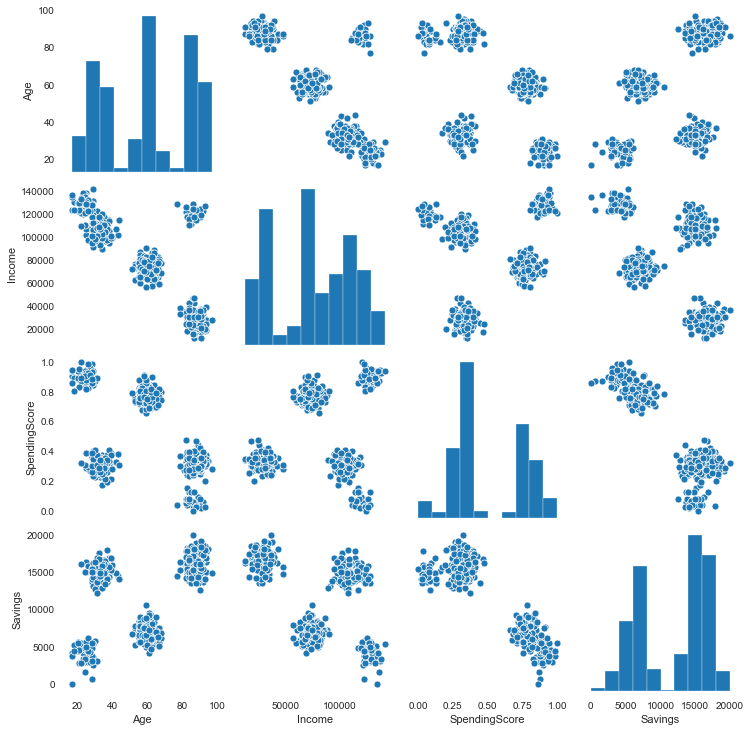

In [5]:
sns.pairplot(df) # Plotting variables against each other to detect patterns. There is a presence of clusters based on the below figure

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

# Normalize the Data

In [6]:
X = df.copy()
#features = ['Income','SpendingScore', 'Age', 'Savings' ,] # Drop Age and Savings
#X=X[features]

In [7]:
    scaler = StandardScaler()

    X = scaler.fit_transform(X)

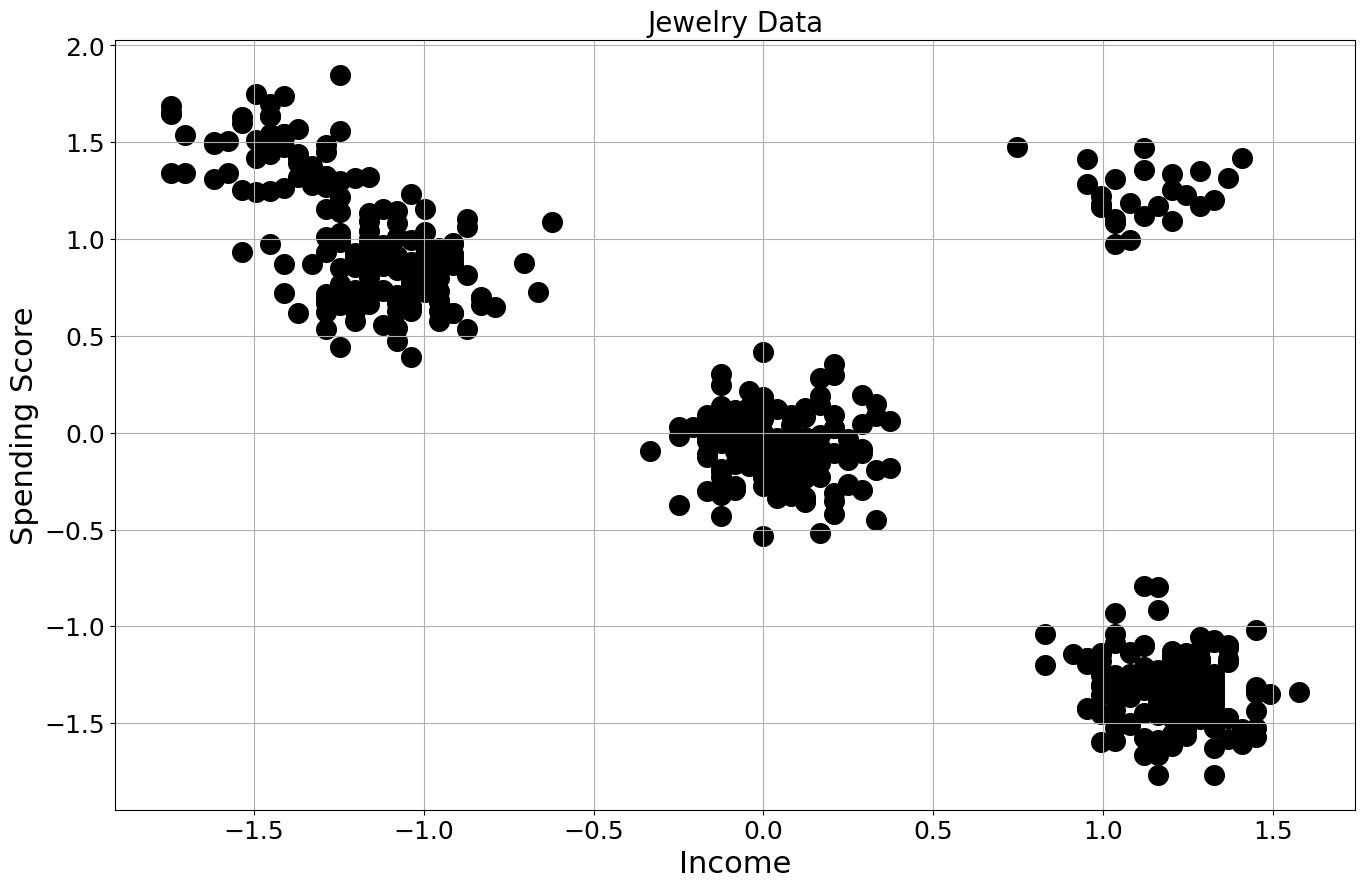

In [8]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X[:, 0], X[:, 1], c="black", s=200);
plt.title("Jewelry Data", fontsize=20);
plt.xlabel('Income', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.savefig('Spending Score Vs Income Raw Data.png');

In [ ]:
# Answer to Question [1], Part [b]

# K-Means

In [9]:
# Use k- means algorithm for clustering
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)   #old seed: 41
k_means.fit(X) 

KMeans(n_clusters=5, random_state=42)

In [10]:
#Check k means labels for each instance 
k_means.labels_

array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

In [11]:
# Checking the clusters means 
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

# Plot the Clusters

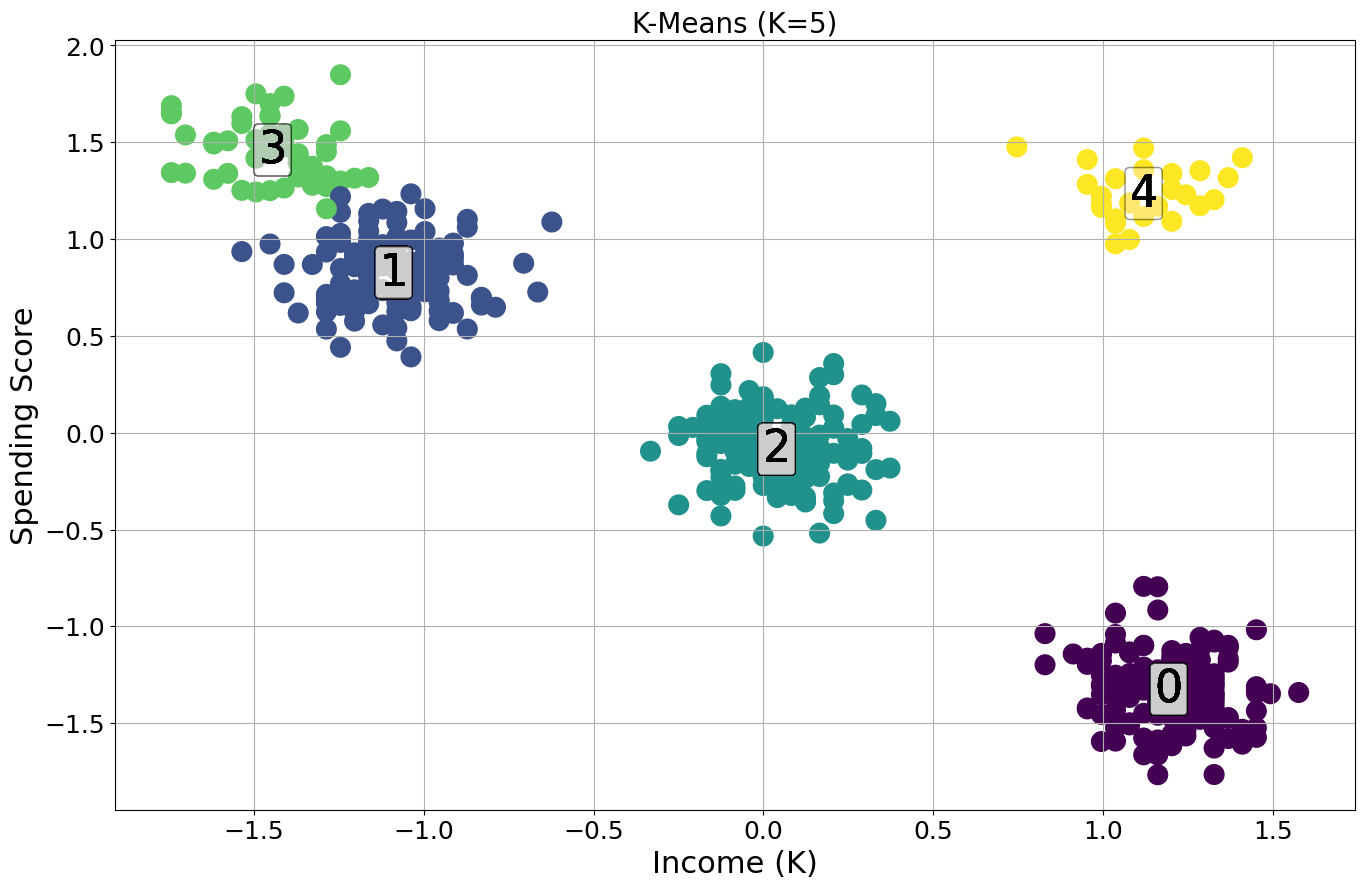

In [12]:
#Visualize clusters using spending score and income features
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(X[:, 0], X[:, 1], s=200, c=k_means.labels_);
#plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));

plt.savefig('Clusters.png');


## Internal Validation Metrics

In [13]:
#  Measuring goodness of fit using intertia for K=5 clusters
k_means.inertia_

66.51111374859076

In [14]:
# Measuring goodness of fit using silhouette score  for K=5 clusters
silhouette_score(X, k_means.labels_)

0.8048976287755765

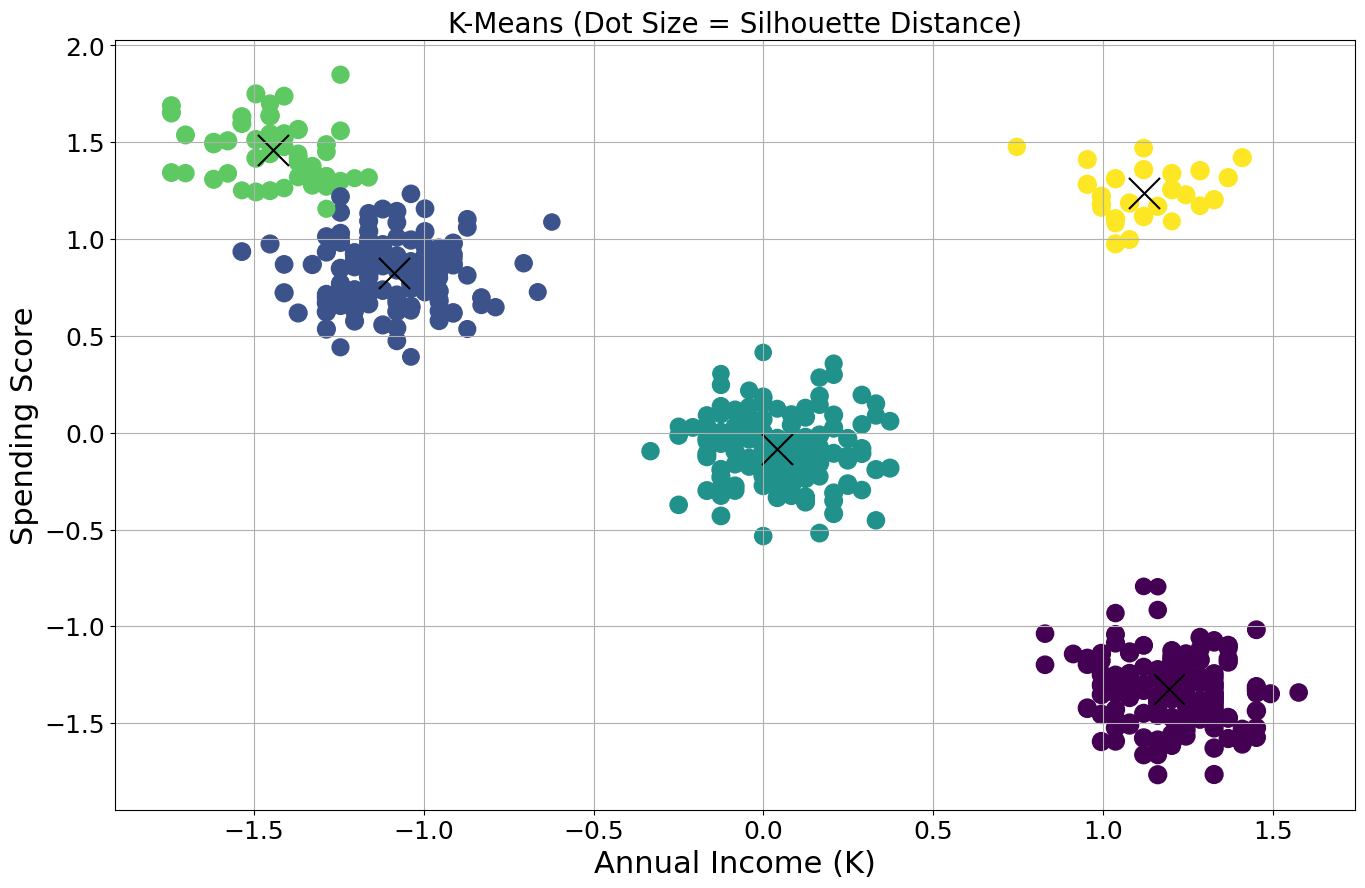

In [15]:
#Visualize cluster center of gravity using spending score and income features

plt.style.use('default');

sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 200*sample_silhouette_values

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X[:, 0], X[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

plt.savefig('kmeans-5-silhouette.png');

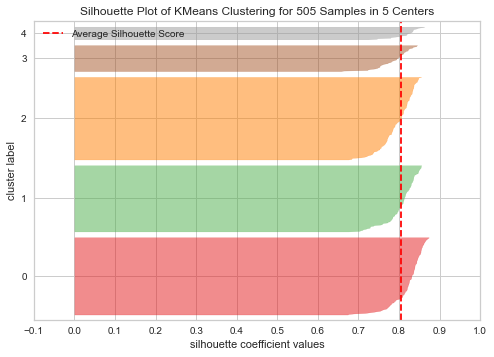

In [18]:
# View silhouette plot for K means clustering for the 5 clusters
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('kmeans-5-silhouette.png', transparent=False);

In [ ]:
# Trying different values for hyperparameter k ( number of clusters) by varying its values from 2 to 11 and observing the change in inertia and silhouette score by plotting their values against k value.


## Elbow Method (Manual)

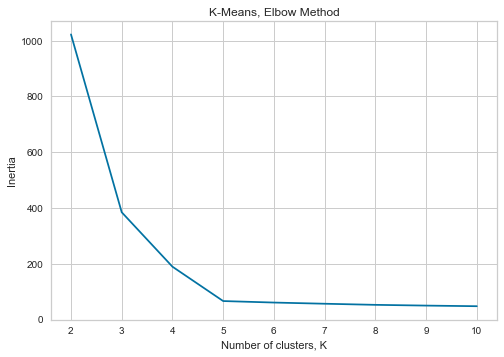

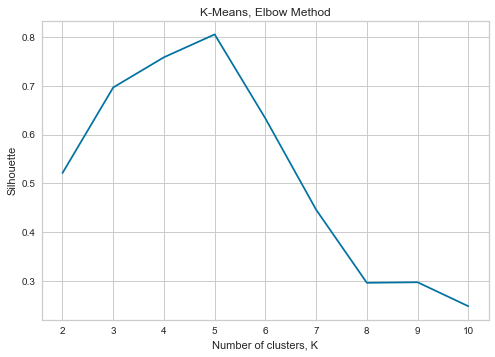

In [19]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig('kmeans-elbow-interia.png');

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig('kmeans-elbow-silhouettes.png');


In [20]:
# Answer to Question [1], Part [c]

## Intepretting the Clusters and Finding Exemplars

In [25]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = df[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)



Cluster 0:


,Age,Income,SpendingScore,Savings
485,90.00000,22782.000000,0.356307,15924.071708
486,91.00000,28165.000000,0.303693,17460.179350
488,92.00000,18724.000000,0.327862,15341.381110
489,97.00000,27271.000000,0.283923,14928.165597
490,84.00000,36463.000000,0.353621,16563.372591
493,92.00000,36032.000000,0.336968,17348.599881
494,87.00000,29909.000000,0.342152,18142.232747
497,91.00000,30756.000000,0.303698,15492.004711
501,93.00000,19934.000000,0.203140,17969.693769
502,90.00000,35297.000000,0.355149,16091.401954



Cluster 1:


,Age,Income,SpendingScore,Savings
454,31.000000,107932.000000,0.374242,12207.526078
457,35.000000,110106.000000,0.286769,14924.537223
460,28.000000,100592.000000,0.259598,15520.355776
461,33.000000,116616.000000,0.320930,15104.498114
463,28.000000,94762.000000,0.303596,15352.521937
468,32.000000,117050.000000,0.311356,14310.546207
471,31.000000,101209.000000,0.304323,16917.571691
476,33.000000,106757.000000,0.258396,14431.652799
477,33.000000,107100.000000,0.342435,14895.473479
482,32.000000,108417.000000,0.287371,16696.398659



Cluster 2:


,Age,Income,SpendingScore,Savings
467,61.000000,72027.000000,0.762325,6926.123598
469,63.000000,70580.000000,0.766509,7262.108723
470,58.000000,70676.000000,0.764028,7664.415651
472,62.000000,73675.000000,0.796619,4688.657157
473,60.000000,63476.000000,0.751900,7543.542802
474,62.000000,67731.000000,0.819170,5956.555677
478,65.000000,70430.000000,0.696994,6971.164886
479,59.000000,69408.000000,0.879906,6491.771150
480,65.000000,71229.000000,0.787890,9024.337461
491,58.000000,70369.000000,0.904520,7461.567503



Cluster 3:


,Age,Income,SpendingScore,Savings
406,25.00,120957.00,0.877673,5590.447216
412,21.00,129726.00,0.951792,4550.799522
415,26.00,125662.00,0.926818,6089.478323
442,17.00,136255.00,0.935876,4126.226651
445,24.00,120465.00,0.907485,4838.348350
451,27.00,122671.00,0.910107,4206.287239
456,17.00,123828.00,0.942013,3798.840400
458,28.00,127699.00,0.881425,5490.814956
466,18.00,123718.00,0.806553,4420.445821
487,26.00,123005.00,0.984526,4371.234733



Cluster 4:


,Age,Income,SpendingScore,Savings
283,90.0,124170.00,0.030751,14773.407206
288,83.0,117347.00,0.155694,15086.701120
311,85.0,118169.00,0.123196,14855.951024
312,88.0,114767.00,0.032208,17833.093470
343,84.0,115237.00,0.068778,14396.568282
351,91.0,118794.00,0.019212,14047.388986
353,77.0,128596.00,0.040824,14503.410786
368,84.0,110582.00,0.079049,14937.995170
383,87.0,117564.00,0.128280,14000.248965
414,88.0,123651.00,0.029027,13504.577572


In [22]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = df[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    print(exemplar)



Cluster 0:


,320
Age,87.000000
Income,12000.000000
SpendingScore,0.342991
Savings,16180.265252



Cluster 1:


,339
Age,34.000000
Income,89598.000000
SpendingScore,0.340152
Savings,12832.768721



Cluster 2:


,278
Age,59.000000
Income,56321.000000
SpendingScore,0.806566
Savings,6129.288986



Cluster 3:


,360
Age,28.000000
Income,117108.000000
SpendingScore,0.857078
Savings,4749.879237



Cluster 4:


,368
Age,84.000000
Income,110582.000000
SpendingScore,0.079049
Savings,14937.995170


In [23]:
#Printing summary statistics for each cluster

for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = df[k_means.labels_==label].copy()
    X_tmp.loc['min'] = X_tmp.min()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.loc['max'] = X_tmp.max()
    X_tmp.loc['Variance'] = X_tmp.var()
    X_tmp.loc['Skewness'] = X_tmp.skew()
    X_tmp.loc['Kurtosis'] = X_tmp.kurtosis()
    X_tmp.tail(6).transpose()


Cluster 0:


,min,mean,max,Variance,Skewness,Kurtosis
Age,79.000000,87.716216,97.00000,1.315232e+01,-7.741459,59.955573
Income,12000.000000,27758.898649,46977.00000,4.489007e+07,12.288143,151.998843
SpendingScore,0.203140,0.327951,0.47355,2.250658e-03,-1.137802,103.664551
Savings,13470.970605,16637.718940,20000.00000,1.516411e+06,12.286317,151.930481



Cluster 1:


,min,mean,max,Variance,Skewness,Kurtosis
Age,22.000000,32.692913,44.000000,1.593658e+01,-0.273316,12.636501
Income,89598.000000,105142.440945,119877.000000,3.969310e+07,11.401698,130.997230
SpendingScore,0.174120,0.308857,0.411112,2.246879e-03,-1.481538,103.892419
Savings,12207.526078,14941.083168,17968.553929,1.230750e+06,11.399889,130.930706



Cluster 2:


,min,mean,max,Variance,Skewness,Kurtosis
Age,51.000000,59.898734,68.000000,1.209811e+01,-4.936523,49.726133
Income,56321.000000,72345.993671,90422.000000,4.187363e+07,12.688504,161.997743
SpendingScore,0.657314,0.770796,0.910417,2.284674e-03,-5.997367,155.325033
Savings,4077.658657,6872.172737,10547.775368,1.220259e+06,12.686023,161.945629



Cluster 3:


,min,mean,max,Variance,Skewness,Kurtosis
Age,17.000000,24.039216,31.000000,1.452807e+01,-0.448746,7.502446
Income,117108.000000,127814.980392,142000.000000,3.654171e+07,7.348453,54.998393
SpendingScore,0.806553,0.895120,1.000000,2.141680e-03,-5.965604,52.805013
Savings,0.000000,4007.372852,6089.478323,1.935265e+06,7.348154,54.996298



Cluster 4:


,min,mean,max,Variance,Skewness,Kurtosis
Age,77.000000,85.653846,93.000000,1.673790e+01,-4.636883,12.312669
Income,110582.000000,119583.961538,128596.000000,2.772329e+07,5.385156,29.998681
SpendingScore,0.000000,0.065748,0.155694,1.859509e-03,0.449963,14.293522
Savings,12554.692742,14721.991829,17833.093470,1.721333e+06,5.385021,29.993902
